# THE SPARKS FOUNDATION
# Name:ROHINI ROY
# Computer Vision & IOT TASK 2

In [1]:
!pip install opencv-python

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76



%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (333, 500, 3)


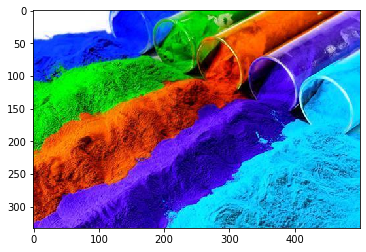

In [3]:
image = cv2.imread('02.jpg')
# image = cv2.imread('01.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

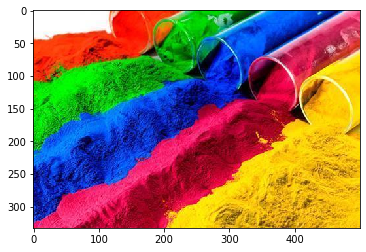

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

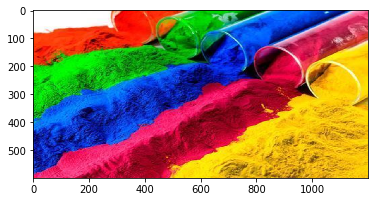

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [6]:
# COLOR IDNTIFICATION
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
#     print(modified_image)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    print(labels)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[0 0 0 ... 0 0 0]


[array([239.6310004 , 197.50966838,  48.70734674]),
 array([ 16.0384216 , 163.33139682,  19.50141731]),
 array([ 13.59868756,  61.26471672, 192.26169881]),
 array([196.38175487,  29.98365728,  51.93033413])]

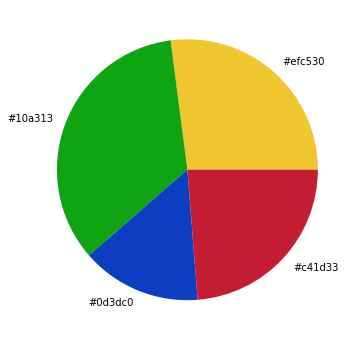

In [9]:
get_colors(get_image('02.jpg'), 4, True)
# get_colors(get_image('01.jpg'), 9, True)